In [32]:
# Import Libraries #
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import numpy as np # linear algebra
import matplotlib.pyplot as plt  # matplotlib for plotting
import seaborn as sns  # seaborn to help with visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Performance des élèves aux examens
Notes obtenues par les élèves dans différentes matières Cet ensemble de données est constitué des notes obtenues par les élèves dans différentes matières. Il s'agit de comprendre l'influence des antécédents des parents, de la préparation aux examens, etc. sur les performances des élèves.

In [3]:
Student = pd.read_csv('StudentsPerformance.csv')
Student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# le data set contient 1000 lignes et 8 colonnes
Student.shape

(1000, 8)

In [5]:
# Information sur le type des données
Student.info()
# les données semblent être au bon type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
Student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Nettoyage et préparation du dataset

In [7]:
Student.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
# Vérification si présence de valeur manquante 
Student.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
# Vérification si doublon
Student.duplicated().sum()

0

In [10]:
Student['gender'].value_counts()
# il y' a plus de filles que de garcons

female    518
male      482
Name: gender, dtype: int64

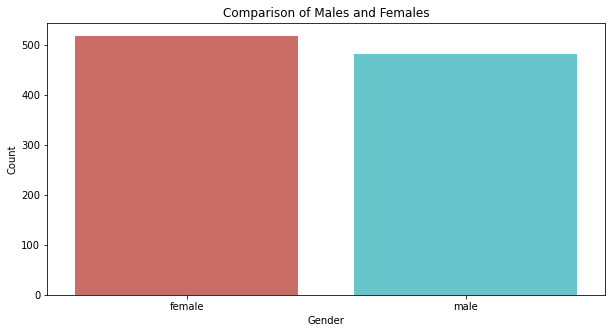

In [33]:
# Comparaison du nombre de filles et de garcons
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('seaborn-pastel')
sns.countplot(Student['gender'], palette = "hls")
plt.title('Comparaison of Males and Females', fontweight = 20)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
Student['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

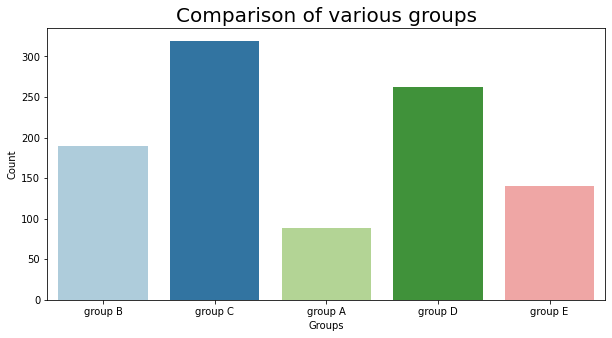

In [34]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('seaborn-muted')
sns.countplot(Student['race/ethnicity'], palette="Paired")
plt.title('Comparaison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('Count')
plt.show()

In [12]:
Student['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

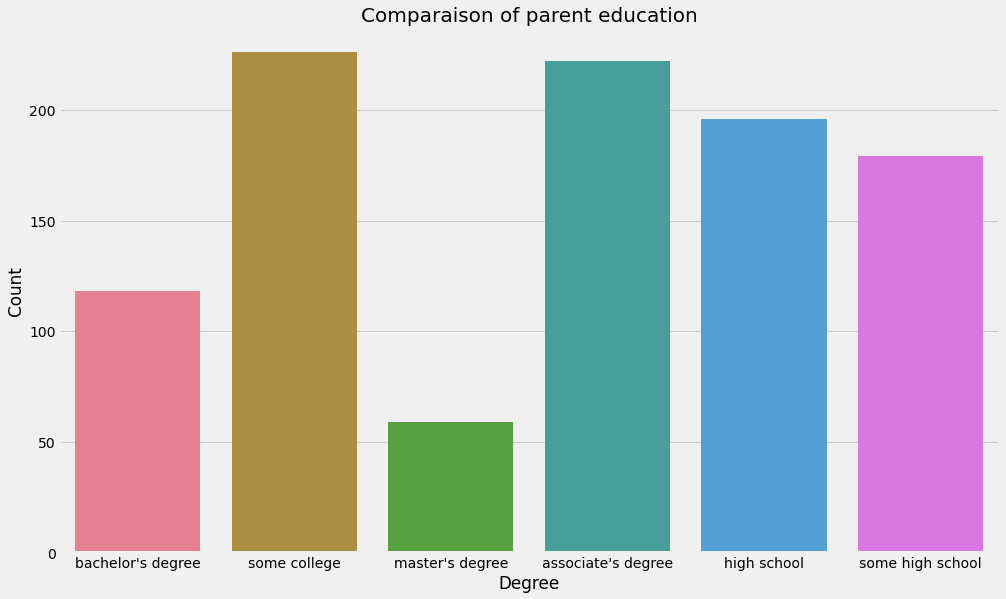

In [37]:

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(Student['parental level of education'], palette="husl")
plt.title('Comparaison of parent education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

In [13]:
Student['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

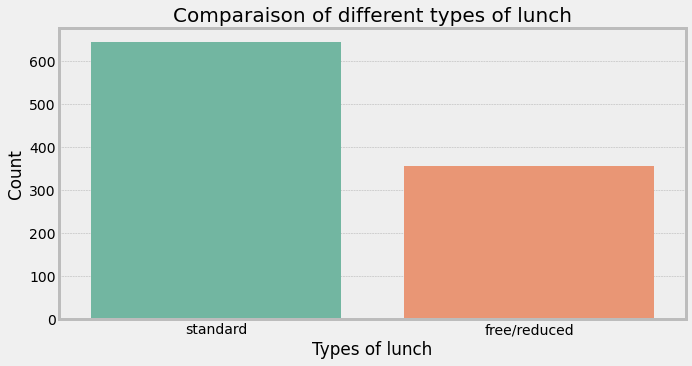

In [39]:
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('bmh')
sns.countplot(Student['lunch'], palette = "Set2")
plt.title('Comparaison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

In [14]:
Student['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

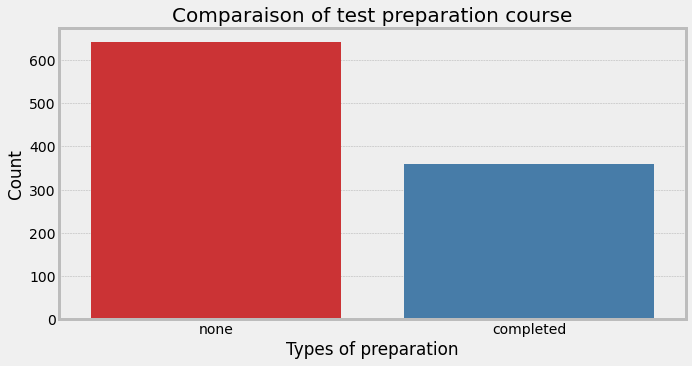

In [40]:
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('bmh')
sns.countplot(Student['test preparation course'], palette = "Set1")
plt.title('Comparaison of test preparation course', fontweight = 30, fontsize = 20)
plt.xlabel('Types of preparation')
plt.ylabel('Count')
plt.show()

# Analyse des notes en fonctions des colonnes catégorielles. 


Dans la simplification de notre analyse, je vais trier mon dataset par ordre du plus haut niveau de diplome des parents : 'parental level of education'

In [15]:
Student_2 = Student

In [16]:
# je crée une colonne 'parental level of education _2' dont les lignes sont identiques au parental level of education. 
#par la suite, je ferai un tri sur cette colonne pour avoir en première ligne, le niveau d'études les plus élévés. 
Student_2["parental level of education_2"] = Student_2["parental level of education"]


In [17]:
Student_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental level of education_2
0,female,group B,bachelor's degree,standard,none,72,72,74,bachelor's degree
1,female,group C,some college,standard,completed,69,90,88,some college
2,female,group B,master's degree,standard,none,90,95,93,master's degree
3,male,group A,associate's degree,free/reduced,none,47,57,44,associate's degree
4,male,group C,some college,standard,none,76,78,75,some college


In [42]:
# je crée un dictionnaire affectant un numero en fonction du niveau d'études et je pourrais par la suite faire un tri
mapping = {
    'some high school': 6,
    'high school': 5,
    'some college': 4,
    'bachelor\'s degree': 2,
    'master\'s degree': 1,
    'associate\'s degree': 3,
}
for i, row in Student_2.iterrows():
    educ = row['parental level of education']
    Student_2.loc[i,'parental level of education_2'] = mapping[educ]
Student_2.head

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental level of education_2
410,female,group D,master's degree,standard,completed,70,71,74,1
957,female,group D,master's degree,standard,none,92,100,100,1
713,male,group D,master's degree,standard,none,81,81,84,1
32,female,group E,master's degree,free/reduced,none,56,72,65,1
845,male,group E,master's degree,standard,none,90,85,84,1
...,...,...,...,...,...,...,...,...,...
361,male,group B,some high school,standard,completed,85,84,78,6
642,female,group B,some high school,free/reduced,none,72,81,79,6
650,male,group C,some high school,free/reduced,completed,51,56,53,6
657,male,group D,some high school,standard,none,69,66,61,6


In [21]:
# tri par ordre croissant sur la colonne parental level of education_2
Student_2 = Student_2.sort_values(by='parental level of education_2')
Student_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental level of education_2
410,female,group D,master's degree,standard,completed,70,71,74,1
957,female,group D,master's degree,standard,none,92,100,100,1
713,male,group D,master's degree,standard,none,81,81,84,1
32,female,group E,master's degree,free/reduced,none,56,72,65,1
845,male,group E,master's degree,standard,none,90,85,84,1


In [22]:
# Suppression de la colonne parental level of education_2 qui ne nous ait plus utile. 
Student_3 = Student_2.drop(columns = 'parental level of education_2' )
Student_3.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
410,female,group D,master's degree,standard,completed,70,71,74
957,female,group D,master's degree,standard,none,92,100,100
713,male,group D,master's degree,standard,none,81,81,84
32,female,group E,master's degree,free/reduced,none,56,72,65
845,male,group E,master's degree,standard,none,90,85,84


In [27]:
#Ajout d'une colonne total score = sommes des scores
Student_3['total score'] = Student_3['math score'] + Student_3['reading score'] + Student_3['writing score']
Student_3.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
410,female,group D,master's degree,standard,completed,70,71,74,215
957,female,group D,master's degree,standard,none,92,100,100,292
713,male,group D,master's degree,standard,none,81,81,84,246
32,female,group E,master's degree,free/reduced,none,56,72,65,193
845,male,group E,master's degree,standard,none,90,85,84,259


# Notre data set Student_3 est prêt. Let's go pour l'analyse

In [96]:
# Fonction que montre la proximité des données
Student.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


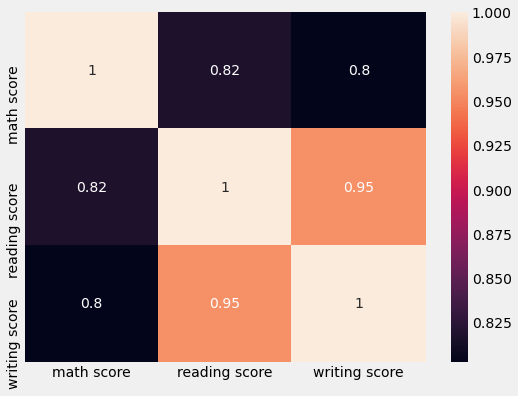

In [97]:
#visuellement
plt.figure(figsize=(8,6))
cor=Student.corr()
sns.heatmap(cor,annot=True)
plt.show()

# 1/ Les filles ont-elles de meilleures que les garcons ? toutes catégories confondues

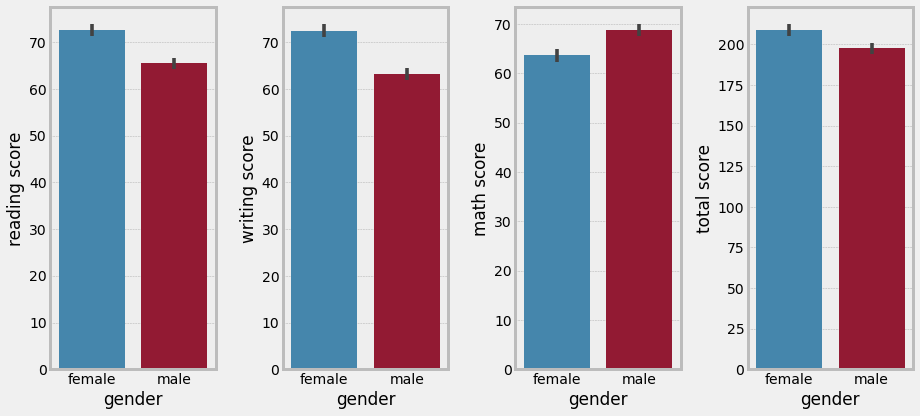

In [49]:
plt.figure(figsize=(13,6))

plt.subplot(1,4,1)
sns.barplot(x = 'gender', y = 'reading score', data = Student_3)

plt.subplot(1,4,2)
sns.barplot(x = 'gender', y = 'writing score', data =  Student_3)

plt.subplot(1,4,3)
sns.barplot(x = 'gender', y = 'math score', data =  Student_3)

plt.subplot(1,4,4)
sns.barplot(x = 'gender', y = 'total score', data =  Student_3)


plt.tight_layout()

In [56]:
Note_Prep = Student_3[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score',
      'total score']].groupby(['test preparation course','gender']).agg('median').reset_index()
Note_Prep

,test preparation course,gender,math score,writing score,reading score,total score
0,completed,female,67.0,79.0,78.0,224.0
1,completed,male,73.0,70.0,71.0,213.0
2,none,female,62.0,70.0,71.0,202.5
3,none,male,67.0,60.0,63.0,189.0


# 2/ Le niveau d'études des parents a t-il un impact sur les notes obtenues des enfants ? 

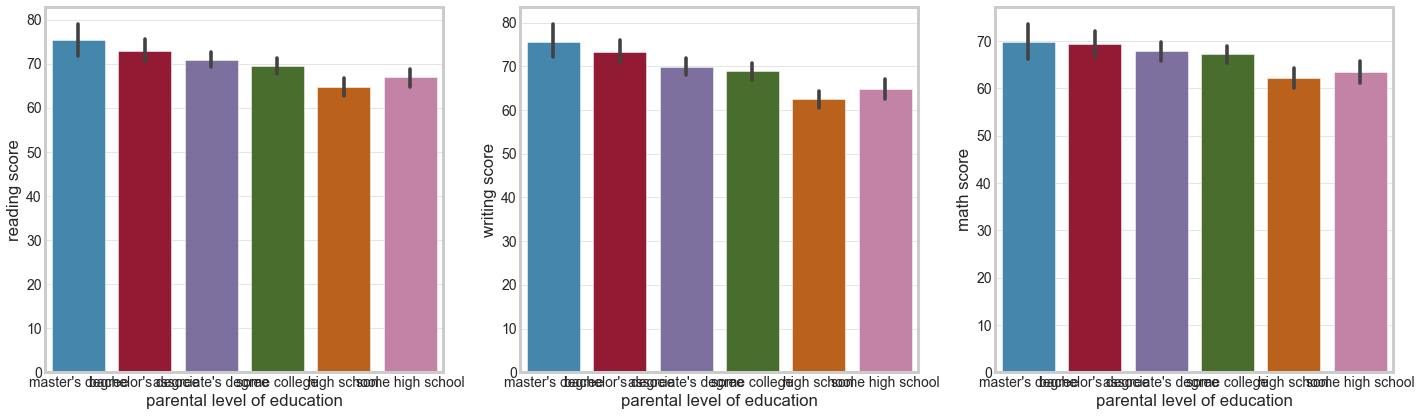

In [152]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.barplot(x = 'parental level of education', y = 'reading score', data = Student_3)

plt.subplot(1,3,2)
sns.barplot(x = 'parental level of education', y = 'writing score', data =  Student_3)

plt.subplot(1,3,3)
sns.barplot(x = 'parental level of education', y = 'math score', data =  Student_3)


plt.tight_layout()

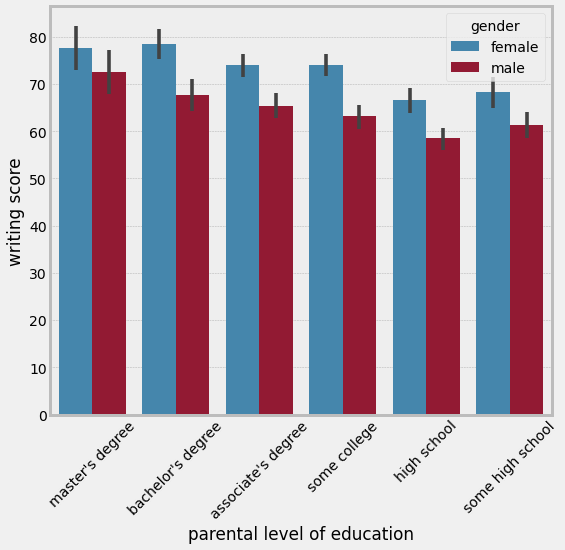

In [73]:
plt.figure(figsize=(8,7))
sns.barplot(x = "parental level of education", y = "writing score", hue = "gender", data = Student_3)
plt.xticks(rotation=45)
plt.show()

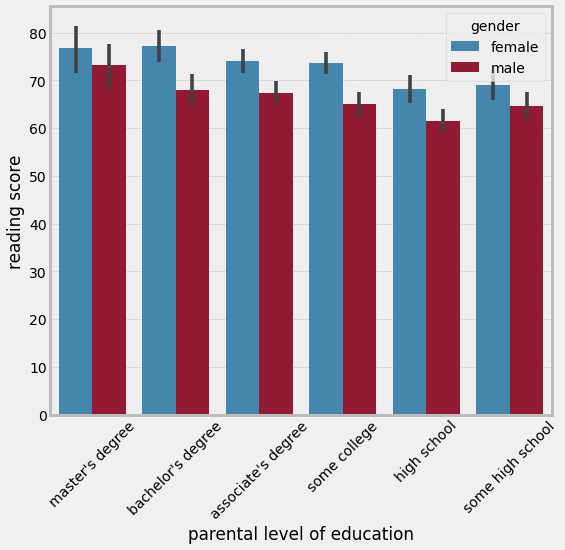

In [74]:
plt.figure(figsize=(8,7))
sns.barplot(x = "parental level of education", y = "reading score", hue = "gender", data = Student_3)
plt.xticks(rotation=45)
plt.show()

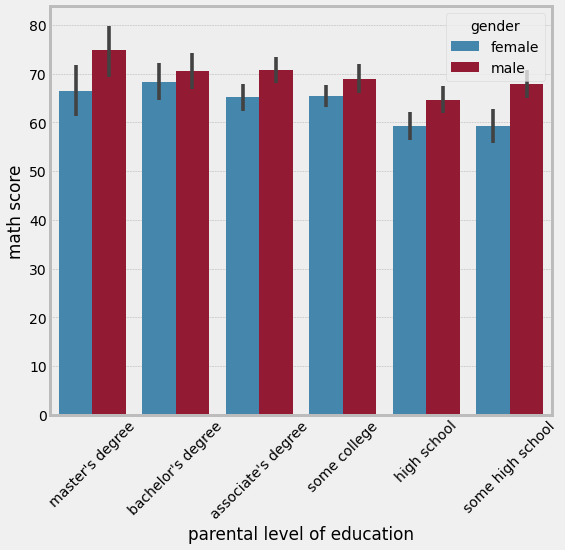

In [75]:
plt.figure(figsize=(8,7))
sns.barplot(x = "parental level of education", y = "math score", hue = "gender", data = Student_3)
plt.xticks(rotation=45)
plt.show()

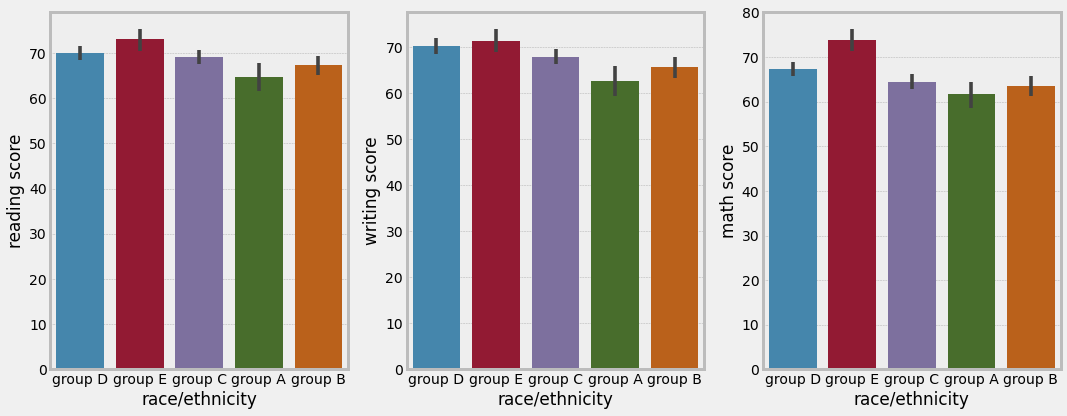

In [85]:
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.barplot(x = "race/ethnicity", y = 'reading score', data = Student_3)

plt.subplot(1,4,2)
sns.barplot(x = "race/ethnicity", y = 'writing score', data =  Student_3)

plt.subplot(1,4,3)
sns.barplot(x = "race/ethnicity", y = 'math score', data =  Student_3)


plt.tight_layout()

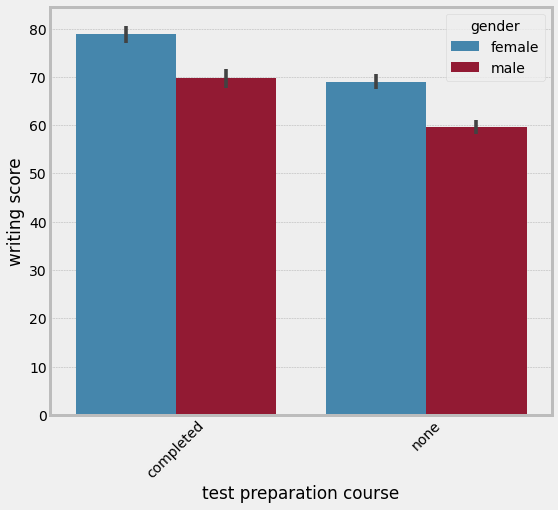

In [87]:
plt.figure(figsize=(8,7))
sns.barplot(x = "test preparation course", y = "writing score", hue = "gender", data = Student_3)
plt.xticks(rotation=45)
plt.show()

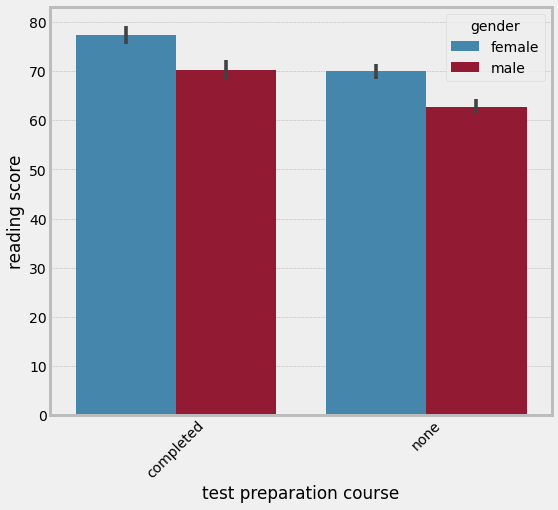

In [88]:
plt.figure(figsize=(8,7))
sns.barplot(x = "test preparation course", y = "reading score", hue = "gender", data = Student_3)
plt.xticks(rotation=45)
plt.show()

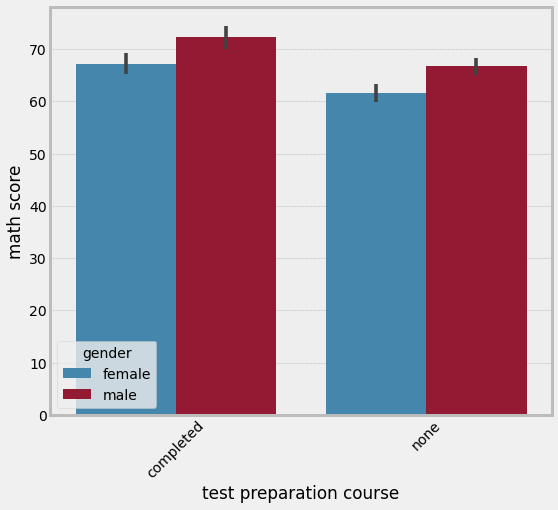

In [90]:
plt.figure(figsize=(8,7))
sns.barplot(x = "test preparation course", y = "math score", hue = "gender", data = Student_3)
plt.xticks(rotation=45)
plt.show()

In [95]:
Student_best = Student_3.sort_values(by=['total score'],ascending=False)
Student_best

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
962,female,group E,associate's degree,standard,none,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297
...,...,...,...,...,...,...,...,...,...
76,male,group E,some high school,standard,none,30,26,22,78
327,male,group A,some college,free/reduced,none,28,23,19,70
596,male,group B,high school,free/reduced,none,30,24,15,69
980,female,group B,high school,free/reduced,none,8,24,23,55


# Application d'un système de notation de notes

In [98]:
# Fonction pour assigner le système de notation
def get_grade(marks):
    if marks >= 91:
        return 'O'
    elif marks >= 82 and marks < 91:
        return 'A+'
    elif marks >=73 and marks < 82:
        return 'A'
    elif marks >=64 and marks < 73:
        return 'B+'
    elif marks >= 55 and marks < 64:
        return 'B'
    elif marks >=46 and marks < 55:
        return 'C'
    elif marks >= 35 and marks < 46:
        return 'P'
    elif marks < 35:
        return 'F'

In [100]:
#rajout des colonnes scores par matière
Student_3['reading_grade'] = Student_3['reading score'].apply(get_grade)
Student_3['writing_grade'] = Student_3['writing score'].apply(get_grade)
Student_3['math_grade'] = Student_3['math score'].apply(get_grade)
Student_3.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,reading_grade,writing_grade,math_grade
410,female,group D,master's degree,standard,completed,70,71,74,215,B+,A,B+
957,female,group D,master's degree,standard,none,92,100,100,292,O,O,O
713,male,group D,master's degree,standard,none,81,81,84,246,A,A+,A
32,female,group E,master's degree,free/reduced,none,56,72,65,193,B+,B+,B
845,male,group E,master's degree,standard,none,90,85,84,259,A+,A+,A+


# Visuation des notations par matières

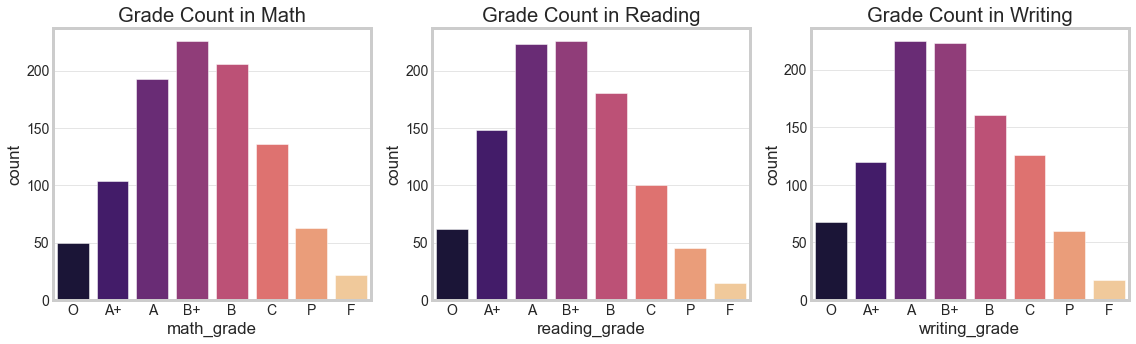

In [101]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.countplot(x ='math_grade', data = Student_3,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade in Math')


plt.subplot(1,3,2)
sns.countplot(x ='reading_grade', data = Student_3,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade in Reading')

plt.subplot(1,3,3)
sns.countplot(x ='writing_grade', data = Student_3,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade in Writing')

plt.tight_layout()

In [103]:
print('-------- GRADE STATISTICS --------')
print('==== MATH GRADE ====')
print(Student_3['math_grade'].value_counts())
print('==== READING GRADE ====')
print(Student_3['reading_grade'].value_counts())
print('==== WRITING GRADE ====')
print(Student_3['writing_grade'].value_counts())

-------- GRADE STATISTICS --------
==== MATH GRADE ====
B+    226
B     206
A     193
C     136
A+    104
P      63
O      50
F      22
Name: math_grade, dtype: int64
==== READING GRADE ====
B+    226
A     223
B     181
A+    148
C     100
O      62
P      45
F      15
Name: reading_grade, dtype: int64
==== WRITING GRADE ====
A     225
B+    223
B     161
C     126
A+    120
O      68
P      60
F      17
Name: writing_grade, dtype: int64


In [105]:
print('Nombre élèves qui ont obtenu le grade O en mathématiques: ', len(Student_3[Student_3['math_grade'] == 'O']))

Nombre élèves qui ont obtenu le grade O en mathématiques:  50


In [107]:
print('Nombre élèves qui ont obtenu le grade O en mathématiques: ', len(Student_3[Student_3['reading_grade'] == 'O']))

Nombre élèves qui ont obtenu le grade O en mathématiques:  62


In [108]:
print('Nombre élèves qui ont obtenu le grade O en mathématiques: ', len(Student_3[Student_3['writing_grade'] == 'O']))

Nombre élèves qui ont obtenu le grade O en mathématiques:  68


In [116]:
brillant_writing = Student_3['writing_grade'] == 'O'
brillant_reading =Student_3['reading_grade'] == 'O'
brillant_math = Student_3['math_grade'] == 'O'

brillant_grade = Student_3[(brillant_writing) & (brillant_reading) & (brillant_math)]
print('Nombre élèves ayant la super gradiation à toutes les matières:',len(brillant_grade))

Nombre élèves ayant la super gradiation à toutes les matières: 23


In [ ]:
Quel est le nombre d'élèves en grande difficulté à toutes les matières

In [117]:
difficult_writing = Student_3['writing_grade'] == 'F'
difficult_reading =Student_3['reading_grade'] == 'F'
difficult_math = Student_3['math_grade'] == 'F'

difficult_grade = Student_3[(difficult_writing) & (difficult_reading) & (difficult_math)]
print('Nombre élèves en grande difficulté à toutes les matières:',len(difficult_grade))

Nombre élèves en grande difficulté à toutes les matières: 8


In [123]:
#Failed students
failed_students =Student_3[(difficult_math) | (difficult_reading)|(difficult_writing)]
failed = len(failed_students)
print('Nombre total élèves en échec:', len(failed_students))

Nombre total élèves en échec: 29


In [130]:
#Passed Students
passed_students = len(Student_3) - len(failed_students)
print('Nombre total élèves en réussite: {}'.format(passed_students))

Nombre total élèves en réussite: 971


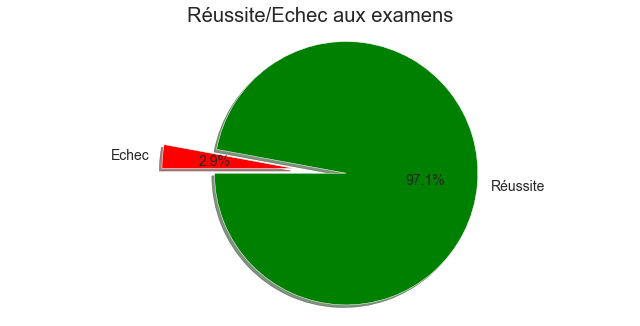

In [136]:
labels = 'Réussite', 'Echec'
sizes = [passed_students, failed]
colors = ['green', 'red']
explode = (.4,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')
plt.title('Réussite/Echec aux examens')
plt.savefig('PieChart01.png')
plt.show()

In [153]:
# Exportation de Student_3 pour visualisation dans d'autres outils
Student_3.to_csv('Students.csv', index=False)